In [1]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [55.5 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [3]:
!wget -q https://downloads.apache.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz
!wget -q https://drive.google.com/u/1/uc?id=1VDkRTtHhh24yS9b9kydBxLhArQi_0AsN&export=download

In [4]:
!tar xf spark-3.1.1-bin-hadoop2.7.tgz

In [5]:
!pip install -q findspark

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

In [7]:
import findspark
findspark.init()

In [8]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Collision")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [9]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -y ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2021-05-07 15:45:17--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.0.242.214, 34.192.46.56, 54.164.22.162, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.0.242.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  17.7MB/s    in 0.7s    

2021-05-07 15:45:18 (17.7 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test c

In [10]:
from pyspark import SparkContext,SparkConf
from pyspark.sql import SparkSession
import pyspark
conf = pyspark.SparkConf()
conf.set("spark.driver.memory","8G");
import numpy as np
sc = SparkContext.getOrCreate(conf=conf)
from pyspark.sql.functions import round, col
from pyspark.sql.types import DateType
from pyspark.sql.functions import to_date

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
person = spark.read.option("header",True).csv("/content/drive/MyDrive/Data Analysis/person_Cleaned.csv",inferSchema=True);

In [14]:
person.cache()
person.printSchema()

root
 |-- UNIQUE_ID: integer (nullable = true)
 |-- COLLISION_ID: integer (nullable = true)
 |-- CRASH_DATE: string (nullable = true)
 |-- CRASH_TIME: string (nullable = true)
 |-- PERSON_ID: string (nullable = true)
 |-- PERSON_TYPE: string (nullable = true)
 |-- PERSON_INJURY: string (nullable = true)
 |-- VEHICLE_ID: integer (nullable = true)
 |-- PERSON_AGE: integer (nullable = true)
 |-- EJECTION: string (nullable = true)
 |-- EMOTIONAL_STATUS: string (nullable = true)
 |-- BODILY_INJURY: string (nullable = true)
 |-- POSITION_IN_VEHICLE: string (nullable = true)
 |-- SAFETY_EQUIPMENT: string (nullable = true)
 |-- PED_LOCATION: string (nullable = true)
 |-- PED_ACTION: string (nullable = true)
 |-- COMPLAINT: string (nullable = true)
 |-- PED_ROLE: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_1: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_2: string (nullable = true)
 |-- PERSON_SEX: string (nullable = true)



In [15]:
person.createOrReplaceTempView("person");

In [16]:
age = spark.sql("select PERSON_AGE, count(PERSON_AGE) from person where PERSON_AGE not in (0,40) group by PERSON_AGE order by PERSON_AGE")   

In [17]:
#age = person.select("PERSON_AGE").distinct().show(150)

In [18]:
#age = age.show()

In [19]:
pip install pyspark_dist_explore

In [20]:
import pandas as pd

In [21]:
#pd.DataFrame(age.collect()).plot.bar(x=0,y=1,color=['orange'],figsize=(15,10))

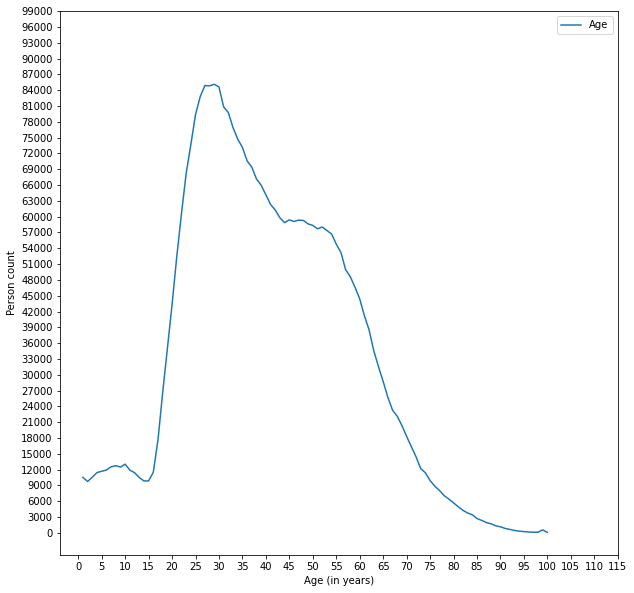

In [22]:
df = pd.DataFrame(age.collect())
plo=pd.DataFrame({
   'Age': df[1].tolist(),
   }, index=df[0].tolist())
plo.plot(figsize=(10,10),yticks=range(0, 100000, 3000),xticks=range(0,120,5),xlabel="Age (in years)",ylabel="Person count")

In [23]:
person.select("POSITION_IN_VEHICLE").distinct().show()

+--------------------+
| POSITION_IN_VEHICLE|
+--------------------+
|Riding/Hanging on...|
|Front passenger, ...|
|Any person in the...|
|If one person is ...|
|      Does Not Apply|
|              Driver|
|Right rear passen...|
|Middle front seat...|
|         Unspecified|
|             Unknown|
|Left rear passeng...|
|Middle rear seat,...|
+--------------------+



In [24]:
position = spark.sql("select POSITION_IN_VEHICLE, count(POSITION_IN_VEHICLE) from person where POSITION_IN_VEHICLE not in ('Unspecified') group by POSITION_IN_VEHICLE order by count(POSITION_IN_VEHICLE) desc ")

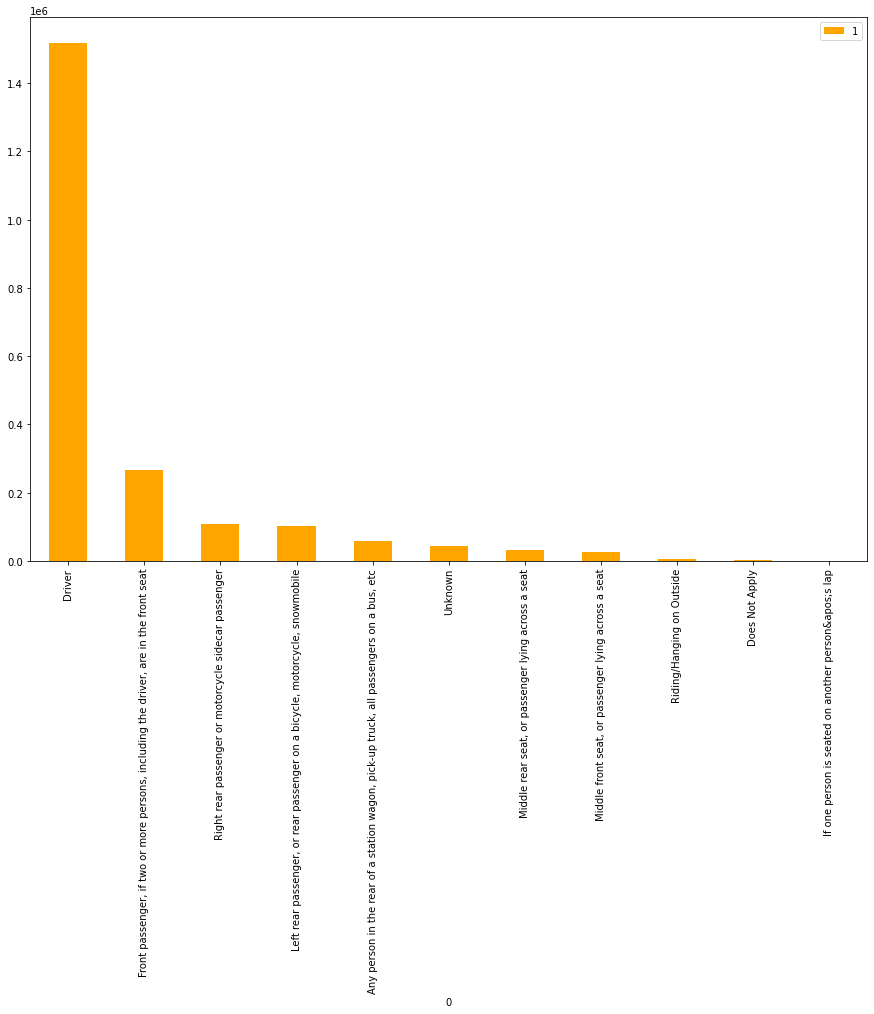

In [25]:
pd.DataFrame(position.collect()).plot.bar(x=0,y=1,color=['orange'],figsize=(15,10))

In [26]:
ptype = spark.sql("select PERSON_TYPE, count(PERSON_TYPE) from person group by PERSON_TYPE order by PERSON_TYPE ")

In [27]:
#pd.DataFrame(ptype.collect()).plot.bar(x=0,y=1,color=['orange'],figsize=(15,10))

In [28]:
person_type = pd.DataFrame(ptype.collect())

In [29]:
person_type = person_type.set_index(0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b0ff65e50>],
      dtype=object)

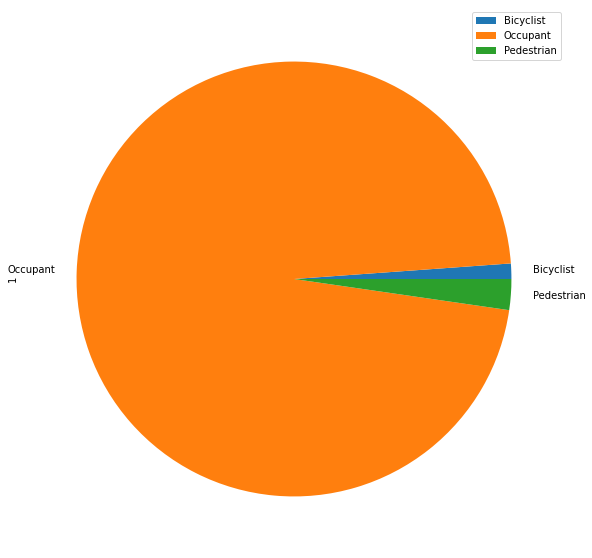

In [30]:
person_type.plot.pie(subplots=True, figsize=(10, 10))

In [31]:
prole = spark.sql("select PED_ROLE, count(PED_ROLE) from person group by PED_ROLE order by count(PED_ROLE) desc")

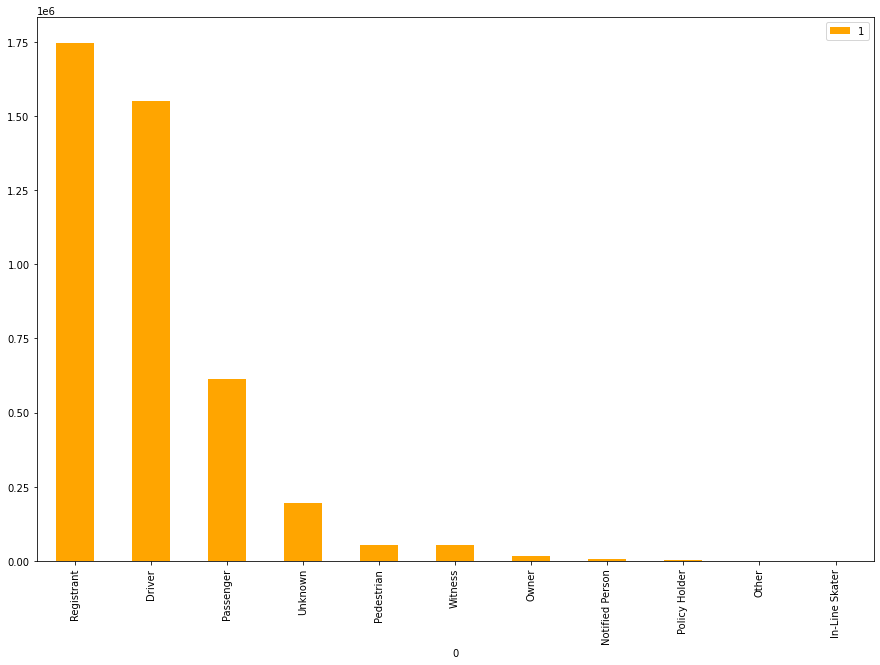

In [32]:
pd.DataFrame(prole.collect()).plot.bar(x=0,y=1,color=['orange'],figsize=(15,10))

In [33]:
collision = spark.read.option("header",True).csv("/content/drive/MyDrive/Data Analysis/collision_cleaned.csv",inferSchema=True);

In [34]:
collision.createOrReplaceTempView("collision");

In [50]:
contribute1 = spark.sql("Select distinct `CONTRIBUTING FACTOR VEHICLE 1` as c1, count(`CONTRIBUTING FACTOR VEHICLE 1`) as count_c1 from collision where `CONTRIBUTING FACTOR VEHICLE 1` not in ('Unspecified', 'Unknown') group by `CONTRIBUTING FACTOR VEHICLE 1` order by count_c1 desc limit 20")

In [51]:
contribute1.show()

+--------------------+--------+
|                  c1|count_c1|
+--------------------+--------+
|Driver Inattentio...|  310750|
|Failure to Yield ...|   94412|
|Following Too Clo...|   81364|
|    Backing Unsafely|   62495|
|     Other Vehicular|   50601|
|Passing or Lane U...|   41022|
| Passing Too Closely|   39122|
|  Turning Improperly|   38808|
|     Fatigued/Drowsy|   37476|
|Unsafe Lane Changing|   30967|
|Traffic Control D...|   25212|
| Driver Inexperience|   23954|
|  Lost Consciousness|   16939|
|        Unsafe Speed|   16367|
| Alcohol Involvement|   15783|
|   Pavement Slippery|   15376|
|Reaction to Uninv...|   14727|
|Prescription Medi...|   13011|
|   Oversized Vehicle|   10273|
|View Obstructed/L...|   10255|
+--------------------+--------+



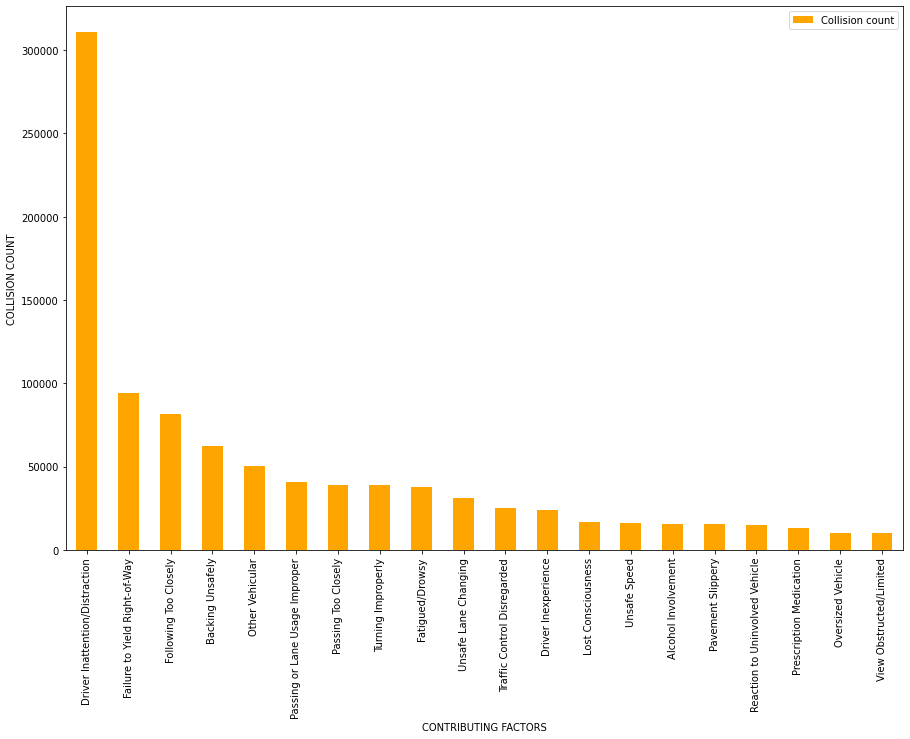

In [58]:
pd.DataFrame(contribute1.collect()).plot.bar(x=0,y=1,color=["orange"],figsize=(15,10),label="Collision count",xlabel="CONTRIBUTING FACTORS",ylabel="COLLISION COUNT")